In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = 'results/California_Housing/random_search_results_all_4bits.csv'
path = r'C:\Users\k_schr40\Downloads\BNG(wisconsin)_hyperparameter_tuning_4bits_100steps.csv'
df = pd.read_csv(path)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
loss_columns = [col for col in df.columns if 'loss' in col]

In [ ]:
df[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
# plt.ylim(0.45,0.8)
plt.title('Boxplot of MSE Losses for 4-bit features in hyperparameter search')
plt.show()

In [ ]:
df[loss_columns].values.argmin(axis=0)

In [ ]:
df.iloc[df[loss_columns].values.argmin(axis=0)]

In [ ]:
df[loss_columns].min()

In [ ]:
mean_values = df.groupby(['hidden_layers', 'hidden_neurons'],as_index=False).min()




In [ ]:
mean_values

In [ ]:
plt.scatter(mean_values['hidden_layers'], mean_values['hidden_neurons'], c = mean_values['val_loss_mlp'], cmap='Greys')
plt.colorbar()
plt.xlabel('Hidden Layers')
plt.ylabel('Hidden Neurons')
plt.title('Scatter plot of MSE Losses for 4-bit features in hyperparameter search')
plt.show()

In [ ]:
hyperparameter = 'num_epochs'
temp = df.groupby(hyperparameter).quantile(0.03) 
temp[loss_columns].plot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby('hidden_layers').mean().boxplot(column=loss_columns, figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

In [ ]:
path = 'results/California_Housing/random_search_results_all_best_val_losses.csv'
df_8bit = pd.read_csv(path)

In [ ]:
df_8bit[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(0.2,0.6)
plt.title('Boxplot of MSE Losses for 8-bit features in hyperparameter search')
plt.show()

In [ ]:
plt.scatter(df['val_loss_mlp'],df['val_loss_soft_hard_comp_mlp'], color = 'blue')
plt.title('Validation Losses for MLP and Soft-Hard Comp MLP')
plt.xlabel('MLP Validation Loss')
plt.ylabel('Soft-Hard Comp MLP Validation Loss')
# plt.plot([0.25, 0.45], [0.25, 0.45], 'r--')
# plt.xlim(0.25, 0.45)
# plt.ylim(0.25, 0.45)
# plt.xticks(np.arange(0.25, 0.46, 0.02))
# plt.yticks(np.arange(0.25, 0.46, 0.02))
plt.grid()
plt.show()

In [ ]:
df.sort_values(by='val_loss_soft_hard_comp_mlp', ascending=True, inplace=True)
df.head()

## Evaluate best models

In [ ]:
path_wine = r'C:\Users\k_schr40\Downloads\wine_quality_best_models__4bits_20runs.csv'
best_models_wine = pd.read_csv(path_wine)

In [ ]:
path_california = r'C:\Users\k_schr40\Downloads\california_best_models__4bits_20runs.csv'
best_models_california = pd.read_csv(path_california)

In [ ]:
path_fried = r'C:\Users\k_schr40\Downloads\fried_best_models__4bits_20runs.csv'
best_models_fried = pd.read_csv(path_fried)

In [ ]:
path_superconduct = r'C:\Users\k_schr40\Downloads\superconduct_best_models__4bits_21runs.csv'
best_models_superconduct = pd.read_csv(path_superconduct)
best_models_superconduct = best_models_superconduct - best_models_superconduct['val_loss_mlp'].mean()

In [ ]:
def create_boxplot(df, dataset_name, y_min = None, y_max = None):
    loss_columns = [col for col in df.columns if 'loss' in col]
    df[loss_columns].boxplot(figsize=(12, 8))
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='r', linestyle='--')
    if y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)
    plt.title(f'Boxplot of MSE Losses for {dataset_name} dataset')
    plt.show()

In [ ]:
create_boxplot(best_models_wine, 'Wine Quality', y_min=-0.1, y_max=0.2)

In [ ]:
create_boxplot(best_models_california, 'California Housing', y_min=-0.02, y_max=0.05)

In [ ]:

create_boxplot(best_models_fried, 'Friedman 1D', y_min=-0.1, y_max=0.6)

In [ ]:
create_boxplot(best_models_superconduct, 'Superconduct',y_min=-20, y_max=20)

In [ ]:
from scipy.stats import sem, t
import numpy as np
def calculate_confidence_intervals(df, confidence=0.95):
    columns = df.columns[:-1]  # Exclude the 'dataset' column
    n = len(df)

    for col in columns:
        mean = df[col].mean()
        std_err = sem(df[col])
        margin_of_error = std_err * t.ppf((1 + confidence) / 2, n - 1)
        lower_bound = mean - margin_of_error
        upper_bound = mean + margin_of_error
        print(f"{col}: Mean = {mean:.4f}, 95% CI = ({lower_bound:.4f}, {upper_bound:.4f})")

In [ ]:
calculate_confidence_intervals(best_models_wine)

In [ ]:
calculate_confidence_intervals(best_models_california)

In [ ]:
calculate_confidence_intervals(best_models_fried)

In [ ]:
calculate_confidence_intervals(best_models_superconduct)

In [ ]:
best_models_wine = best_models_wine - best_models_wine['val_loss_mlp'].mean()
best_models_california = best_models_california - best_models_california['val_loss_mlp'].mean()
best_models_fried = best_models_fried - best_models_fried['val_loss_mlp'].mean()


In [ ]:
import seaborn as sns

# Add a source column to each DataFrame
best_models_wine['dataset'] = 'Wine'
best_models_california['dataset'] = 'California'
best_models_fried['dataset'] = 'Fried'

# Concatenate the DataFrames
combined_df = pd.concat([best_models_wine, best_models_california, best_models_fried])

# Melt the DataFrame for seaborn boxplot
melted_df = combined_df.melt(id_vars='dataset', var_name='Metric', value_name='Value')

# Create the boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=melted_df, x='Metric', y='Value', hue='dataset')
plt.axhline(0, color='red', linestyle='--')
plt.ylim(-0.1,0.5)
plt.xticks(rotation=45)
plt.title('Boxplot of Metrics for Wine, California, and Fried Models')
plt.show()

In [ ]:
best_models_wine

In [ ]:
plt.figure(figsize=(12, 8))
best_models_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
best_models_df.mean()

## Evaluate different bits

In [ ]:
path_wine = r'C:\Users\k_schr40\Downloads\wine_quality_evaluation_from_2_to_8bits_new.csv'
df_wine = pd.read_csv(path_wine)

In [ ]:
df_wine.plot(x='bits', y=loss_columns, kind='line', marker='o', figsize=(12, 8))
plt.ylim(0.4, 0.8)
plt.ylabel('MSE Loss')
plt.show()

In [ ]:
path_california = r'C:\Users\k_schr40\Downloads\california_evaluation_from_2_to_8bits.csv'
df_california = pd.read_csv(path_california)

In [ ]:
df_california.plot(x='bits', y=loss_columns, kind='line', marker='o', figsize=(12, 8))
plt.ylim(0.05, 0.2)
plt.ylabel('MSE Loss')
plt.show()

In [ ]:
path_fried = r'C:\Users\k_schr40\Downloads\fried_evaluation_from_2_to_8bits.csv'
df_fried = pd.read_csv(path_fried)
df_fried.plot(x='bits', y=loss_columns, kind='line', marker='o', figsize=(12, 8))
plt.ylim(0.95, 3.5)
plt.ylabel('MSE Loss')
plt.show()

In [ ]:
path_superconduct = r'C:\Users\k_schr40\Downloads\superconduct_evaluation_from_2_to_8bits_new.csv'
df_superconduct = pd.read_csv(path_superconduct)

In [ ]:
df_superconduct.plot(x='bits', y=loss_columns, kind='line', marker='o', figsize=(12, 8))
plt.ylim(100, 150)
plt.ylabel('MSE Loss')
plt.show()

## Multiple Hyperparametertunings for different bits

In [ ]:
df_min = pd.DataFrame()
for f in [2,3,4,5,6,7,8]:
    path_california = r'C:\Users\k_schr40\Downloads\california_hyperparameter_tuning_{}bits_100steps.csv'.format(f)
    df_california = pd.read_csv(path_california)
    loss_columns = [col for col in df_california.columns if 'loss' in col]
    df_cal_min = df_california.min(axis=0)
    df_cal_min = pd.DataFrame(df_cal_min).T[loss_columns]
    df_cal_min['bits'] = f
    df_min = pd.concat([df_min, df_cal_min], axis=0)

In [ ]:
pd.DataFrame(df_cal_min).T

In [ ]:
df_min

In [ ]:
df_min.plot(x = 'bits', y = [col for col in loss_columns if col!='val_loss_mlp'], kind='line', marker='o', figsize=(12, 8))
plt.axhline(y = df_min['val_loss_mlp'].mean(), color='red', linestyle='--', label='Mean MSE Loss MLP')
plt.legend()
plt.show()

In [ ]:
df_min = pd.DataFrame()
for f in [2,3,4,5,6,7]:
    path_fried = r'C:\Users\k_schr40\Downloads\fried_hyperparameter_tuning_{}bits_100steps.csv'.format(f)
    df_fried = pd.read_csv(path_fried)
    loss_columns = [col for col in df_fried.columns if 'loss' in col]
    df_fried_min = df_fried.min(axis=0)
    df_fried_min = pd.DataFrame(df_fried_min).T[loss_columns]
    df_fried_min['bits'] = f
    df_min = pd.concat([df_min, df_fried_min], axis=0)

In [ ]:
df_min.plot(x = 'bits', y = [col for col in loss_columns if col!='val_loss_mlp'], kind='line', marker='o', figsize=(12, 8))
plt.ylim(1,2)
plt.axhline(y = df_min['val_loss_mlp'].mean(), color='red', linestyle='--', label='Mean MSE Loss MLP')
plt.legend()
plt.show()

## Multiple Runs for multiple bits

In [ ]:
dataset = 'wine_quality'
path_df = r'C:\Users\k_schr40\Downloads\{}_best_models__4bits_20runs_ext.csv'.format(dataset)
df = pd.read_csv(path_df)
loss_columns = [col for col in df.columns if 'loss' in col]
df[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(0.4, 0.6)
plt.show()

In [ ]:
dataset = 'wine_quality'
path_df = r'C:\Users\k_schr40\Downloads\{}_hyperparameter_tuning_4bits_100steps_extended100.csv'.format(dataset)
df_hyp = pd.read_csv(path_df)
df_hyp[loss_columns].min(axis=0)

## Additional tests on California Housing

In [ ]:
path_california = r'C:\\Users\\k_schr40\\Downloads\\california_hyperparameter_tuning_4bits_100steps.csv'

In [ ]:
df_california = pd.read_csv(path_california)

In [ ]:
datasets = ['wine_quality', 'california', 'fried', 'superconduct']
for dataset in datasets:
    path = r'C:\Users\k_schr40\Downloads\{}_hyperparameter_tuning_4bits_100steps.csv'.format(dataset)
    df = pd.read_csv(path)
    path_additional = r'C:\Users\k_schr40\Downloads\{}_hyperparameter_tuning_4bits_100steps_additional.csv'.format(dataset)
    df_additional = pd.read_csv(path_additional)
    df[df_additional.columns[-1]] = df_additional[df_additional.columns[-1]]
    print(dataset)
    print(df[loss_columns].min(axis=0))

In [ ]:
path_california_additional = r'C:\\Users\\k_schr40\\Downloads\\california_hyperparameter_tuning_4bits_100steps_additional.csv'
df_california_additional = pd.read_csv(path_california_additional)

In [ ]:
df_california_additional.columns[-1]

In [ ]:
df_california[df_california_additional.columns[-1]] = df_california_additional[df_california_additional.columns[-1]]

In [ ]:
loss_columns = [col for col in df_california.columns if 'loss' in col]

In [ ]:
df_california[loss_columns].min(axis=0)

## BNG wisconsin

In [36]:
dataset = 'BNG(wisconsin)'
dataset = 'superconduct'
path_df = r'../results\{}_best_models__4bits_20runs_ext.csv'.format(dataset)
df_bng = pd.read_csv(path_df)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'val_loss_mlp'),
  Text(2, 0, 'val_loss_hard_post_mlp'),
  Text(3, 0, 'val_loss_hard_thr_post_mlp'),
  Text(4, 0, 'val_loss_hard_pre_mlp'),
  Text(5, 0, 'val_loss_hard_thr_pre_mlp'),
  Text(6, 0, 'val_loss_soft_mlp'),
  Text(7, 0, 'val_loss_soft_hard_mlp'),
  Text(8, 0, 'val_loss_soft_comp_mlp'),
  Text(9, 0, 'val_loss_soft_hard_comp_mlp'),
  Text(10, 0, 'val_loss_hard_bitwise_minmax_mlp'),
  Text(11, 0, 'val_loss_hard_bitwise_quantile_mlp')])

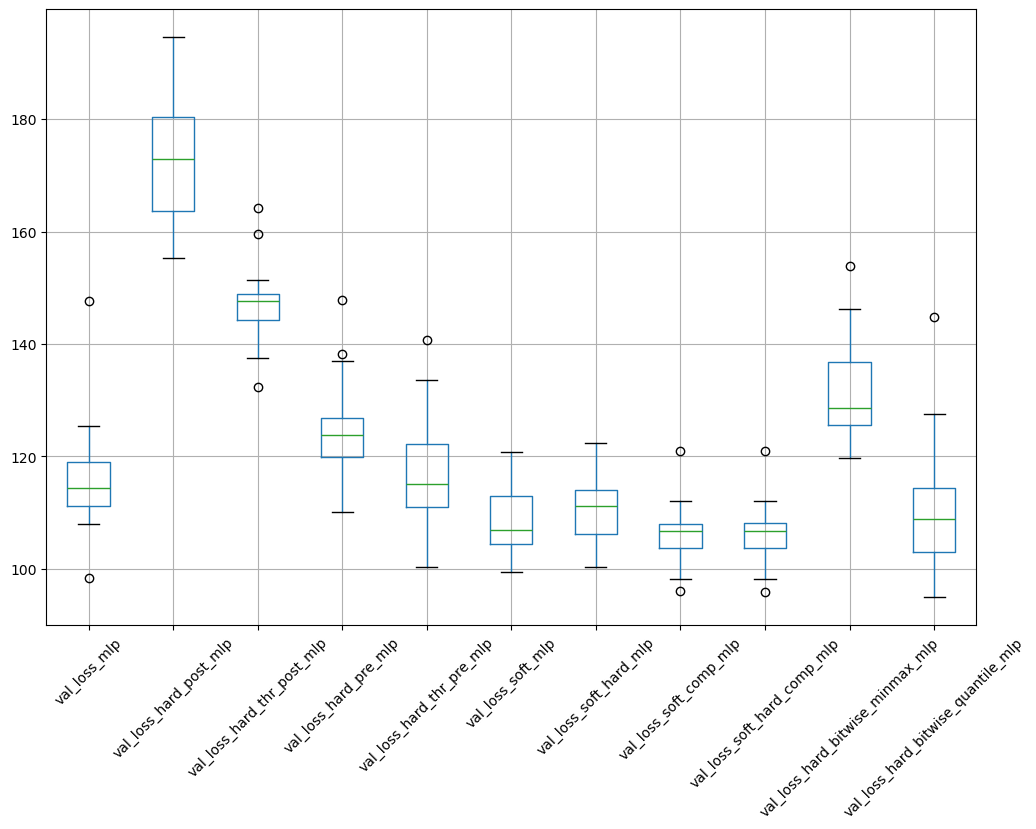

In [37]:
loss_columns = [col for col in df_bng.columns if 'loss' in col]
df_bng[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)

## superconduct

In [27]:
import warnings

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
dataset = 'superconduct'

df_hyp = pd.DataFrame()
for f in range(2,9):
    path_df = r'../results\{}_hyperparameter_tuning_{}bits_100steps_extended100.csv'.format(dataset, f)
    df_current = pd.read_csv(path_df)
    loss_columns = [col for col in df_current.columns if 'loss' in col]
    for loss_col in loss_columns:
        df_current_sorted = df_current.sort_values(by=loss_col, ascending=True)
        df_new = df_current_sorted.iloc[:1]
        df_new['optimal_loss'] = [loss_col]
        df_new['bits'] = f
        df_hyp = pd.concat([df_hyp, df_new], axis=0)

hyperparameter_columns = ['weight_decay', 'learning_rate', 'hidden_layers', 'hidden_neurons', 'num_epochs']
df_hyp[hyperparameter_columns] = (df_hyp[hyperparameter_columns] - df_hyp[hyperparameter_columns].min(axis=0)) / (df_hyp[hyperparameter_columns].max(axis=0) - df_hyp[hyperparameter_columns].min(axis=0))        

In [28]:
df_hyp

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,val_loss_hard_bitwise_minmax_mlp,val_loss_hard_bitwise_quantile_mlp,optimal_loss,bits
0,0.0,0.0,0.6,1.000000,1.0,0.0010,105.531965,802.880977,534.335818,181.288554,115.604518,154.486697,156.760397,108.462090,109.398977,172.445426,127.387950,val_loss_mlp,2
98,0.0,0.0,1.0,0.000000,0.0,0.0001,197.102401,497.650136,414.080747,228.922191,212.952098,188.675859,188.447167,170.264781,170.531323,237.239807,181.077125,val_loss_hard_post_mlp,2
18,1.0,1.0,1.0,0.055118,1.0,0.0001,113.813346,642.531272,289.444629,165.501440,121.753604,128.733243,128.912305,124.798926,124.896283,174.558463,212.501780,val_loss_hard_thr_post_mlp,2
13,1.0,0.0,0.6,1.000000,0.5,0.0010,112.726858,970.625853,633.778004,158.011628,124.038759,111.128539,113.152617,115.592722,118.659203,180.871664,163.716996,val_loss_hard_pre_mlp,2
34,0.0,0.0,0.6,1.000000,1.0,0.0001,123.967228,710.476852,555.839913,160.594948,112.196660,113.410836,113.628625,109.145089,109.367893,169.377138,115.260013,val_loss_hard_thr_pre_mlp,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,1.0,0.0,1.0,0.496063,1.0,0.0001,110.252791,111.049865,117.826048,107.950791,101.807849,95.415329,95.438552,98.547916,98.525367,149.960907,169.420422,val_loss_soft_hard_mlp,8
35,0.0,0.0,0.6,0.055118,1.0,0.0010,118.647162,118.785487,131.105318,119.430929,98.383311,102.047701,104.147487,93.395359,93.628215,132.376362,106.071626,val_loss_soft_comp_mlp,8
35,0.0,0.0,0.6,0.055118,1.0,0.0010,118.647162,118.785487,131.105318,119.430929,98.383311,102.047701,104.147487,93.395359,93.628215,132.376362,106.071626,val_loss_soft_hard_comp_mlp,8
37,0.0,0.0,1.0,0.244094,1.0,0.0010,118.938293,120.893227,167.387870,100.310882,108.672841,115.643701,116.196470,112.117783,112.286500,108.691481,115.121457,val_loss_hard_bitwise_minmax_mlp,8


In [29]:
loss_columns

['val_loss_mlp',
 'val_loss_hard_post_mlp',
 'val_loss_hard_thr_post_mlp',
 'val_loss_hard_pre_mlp',
 'val_loss_hard_thr_pre_mlp',
 'val_loss_soft_mlp',
 'val_loss_soft_hard_mlp',
 'val_loss_soft_comp_mlp',
 'val_loss_soft_hard_comp_mlp',
 'val_loss_hard_bitwise_minmax_mlp',
 'val_loss_hard_bitwise_quantile_mlp']

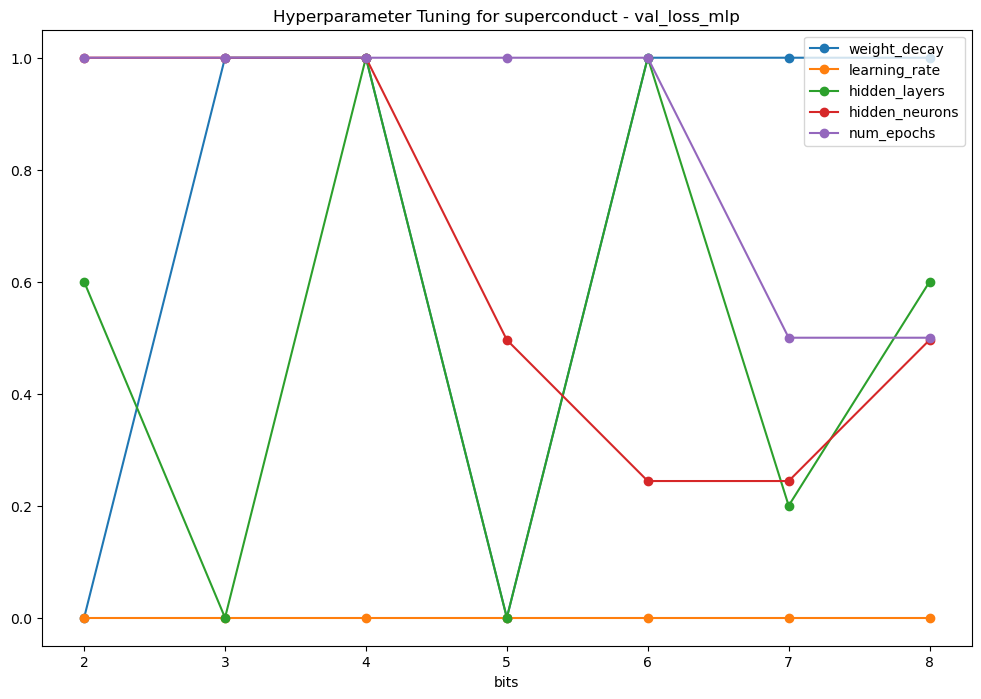

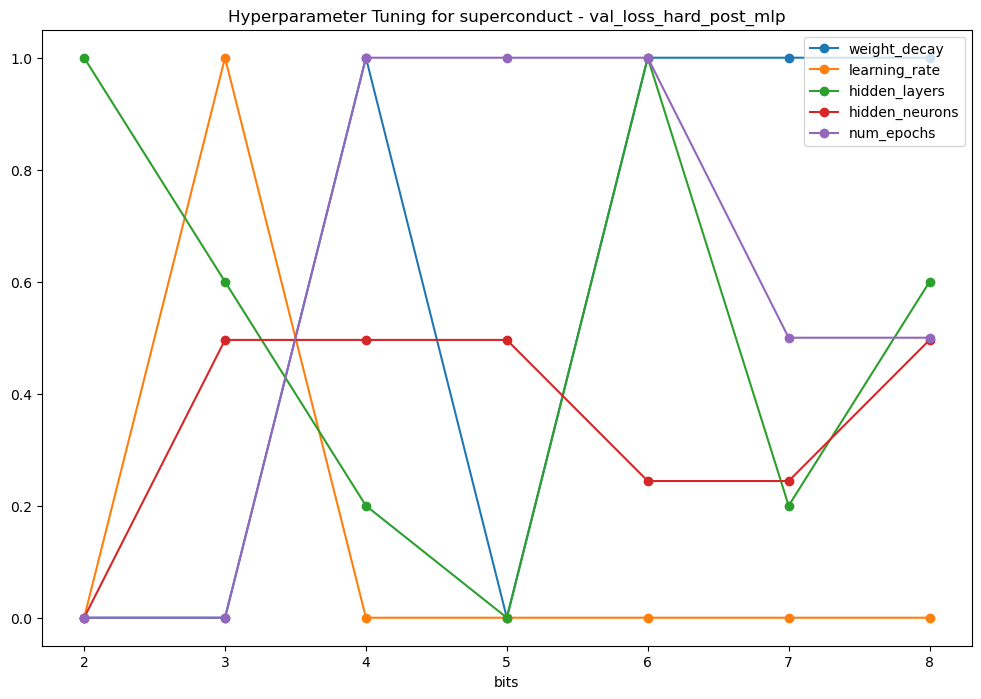

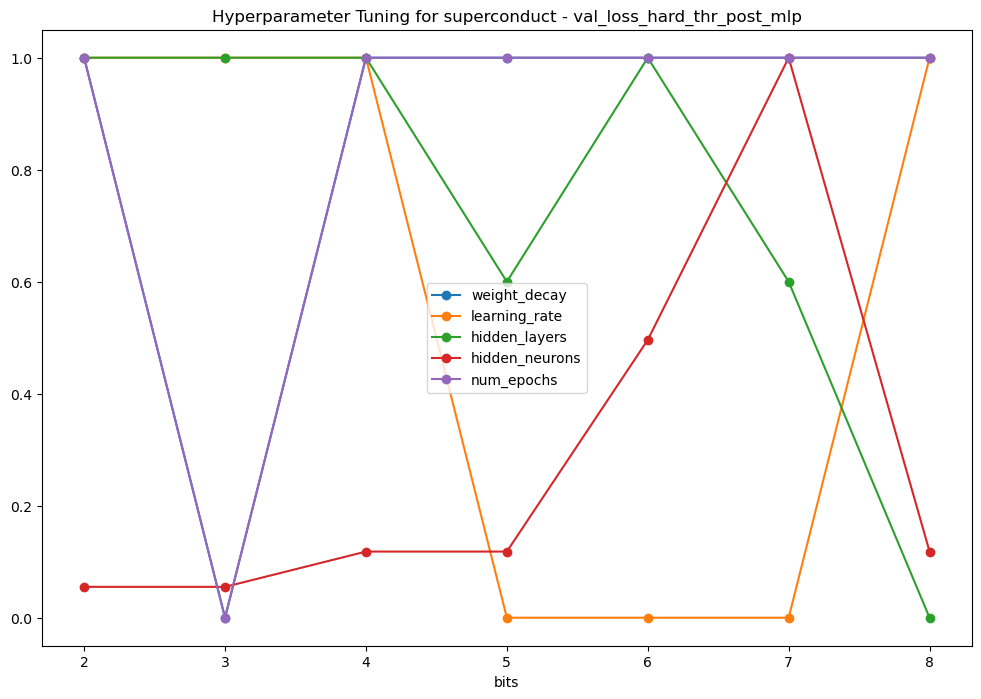

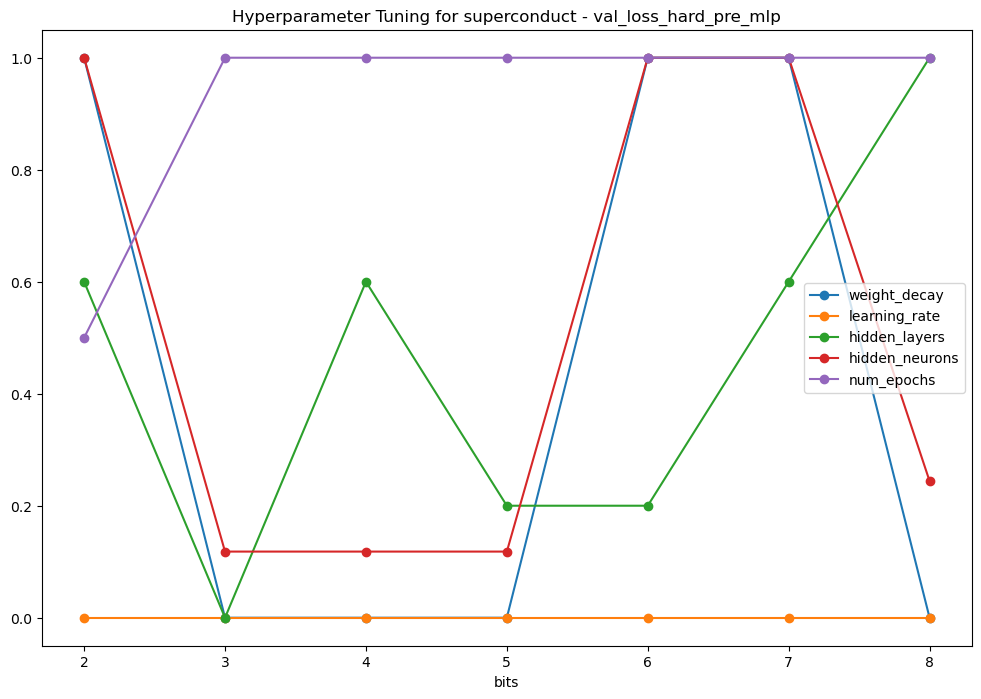

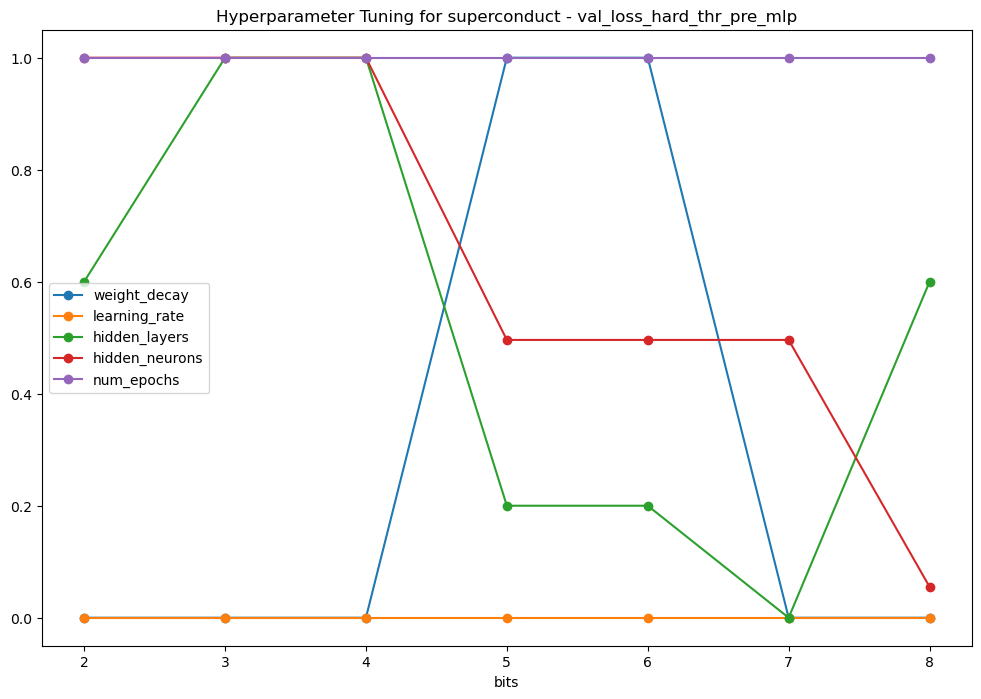

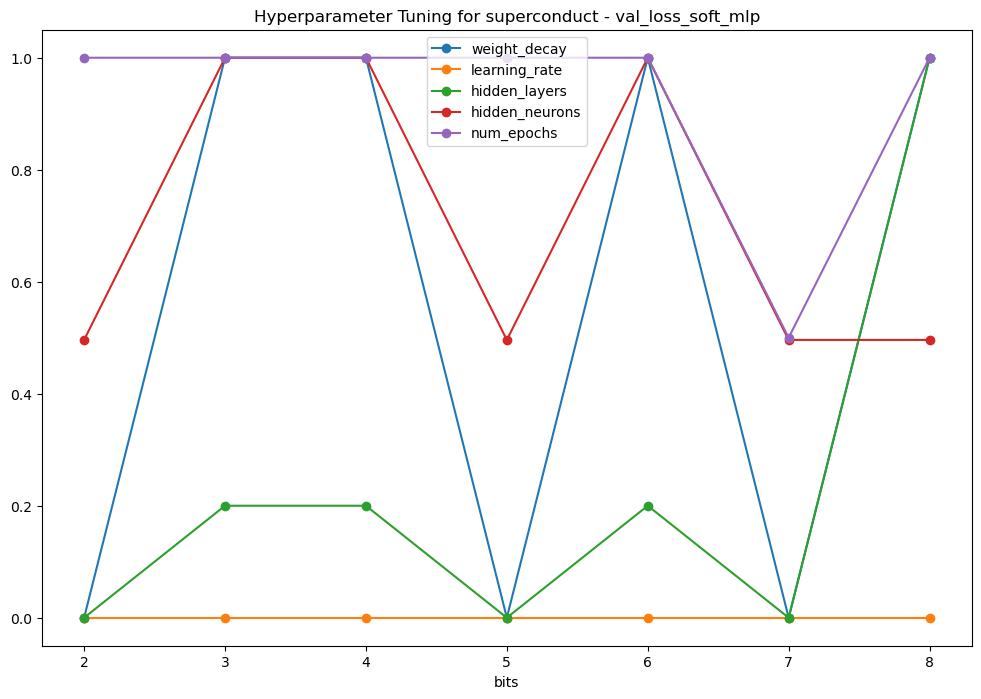

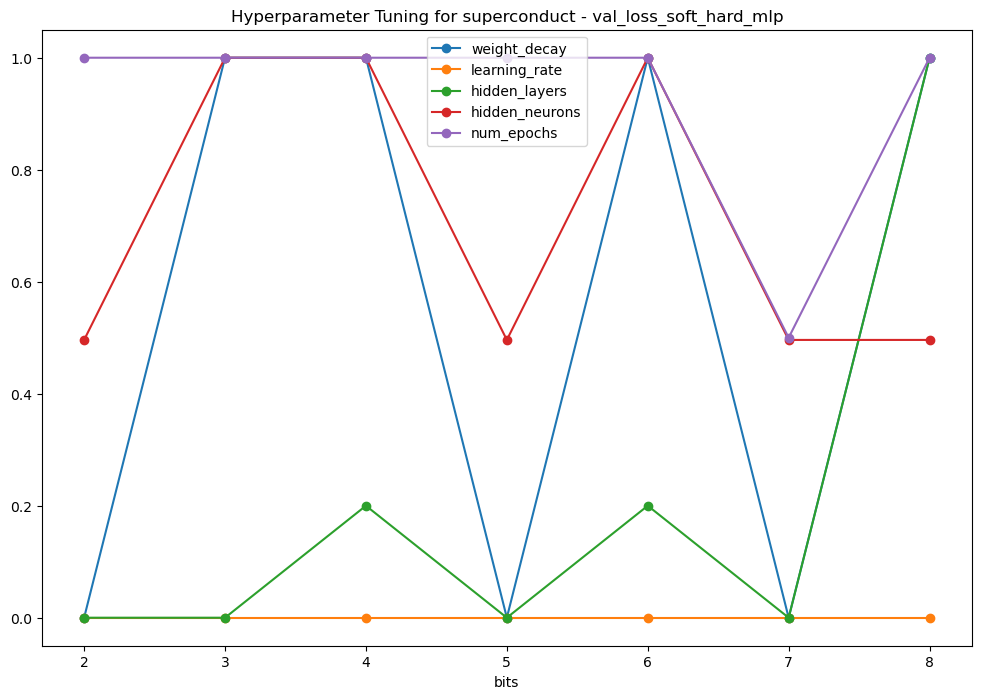

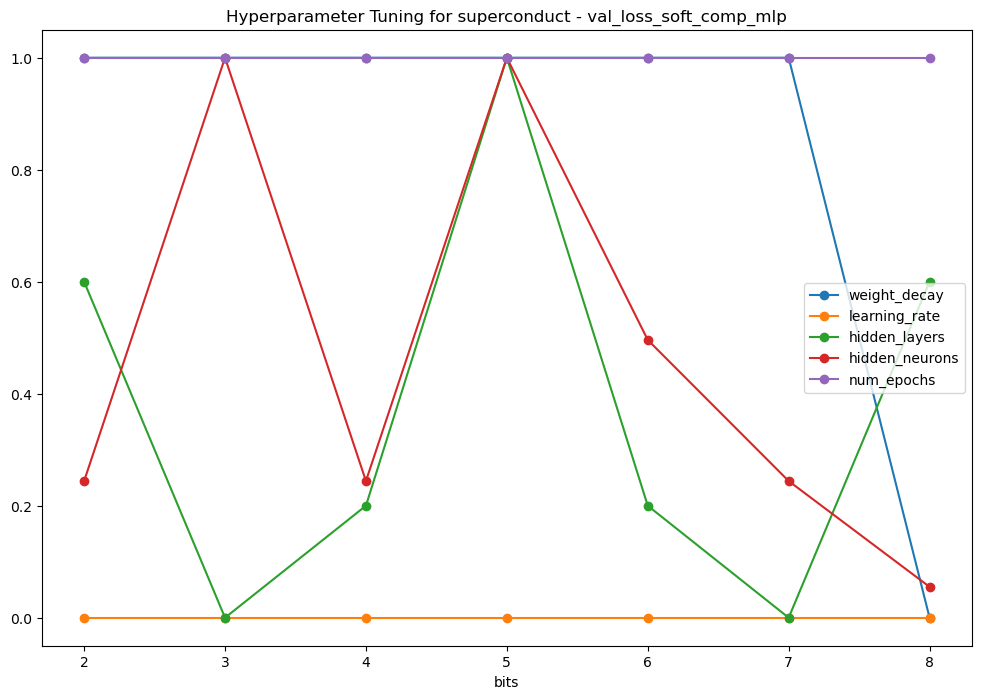

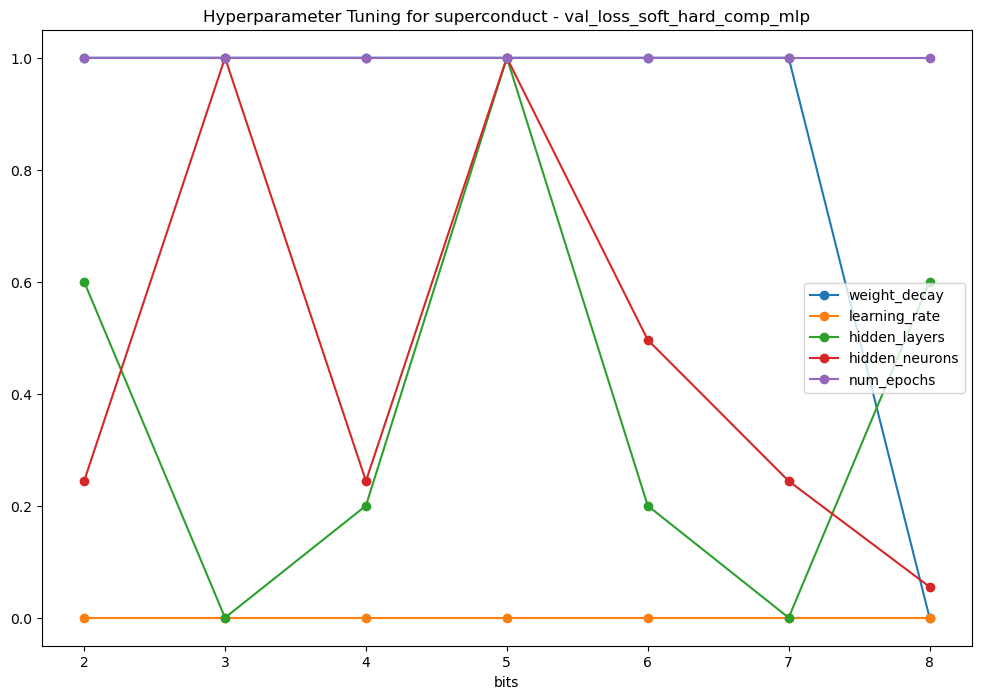

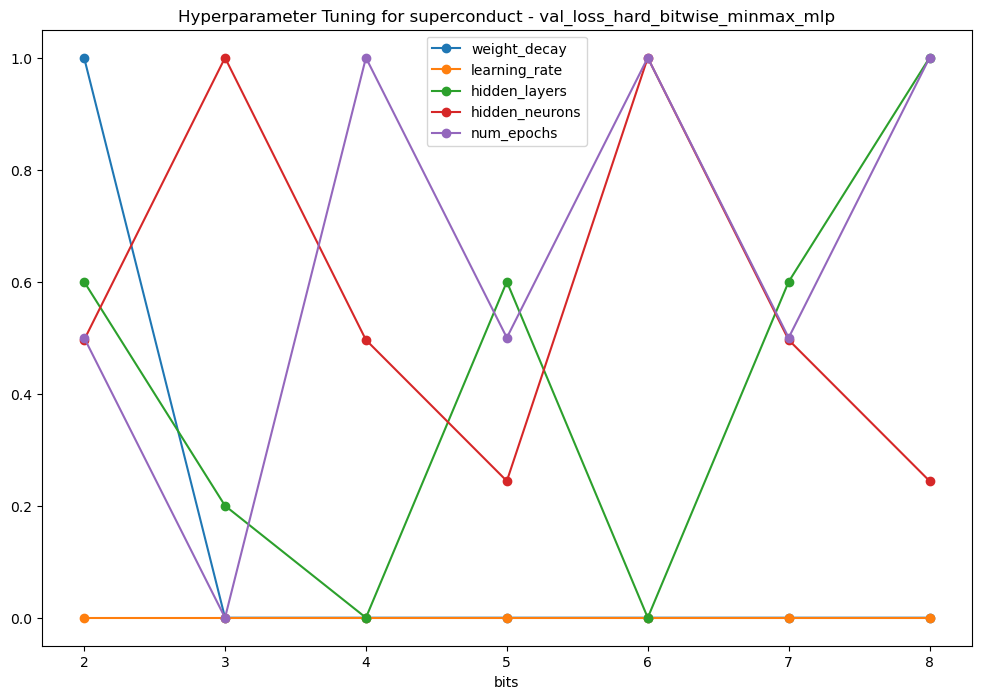

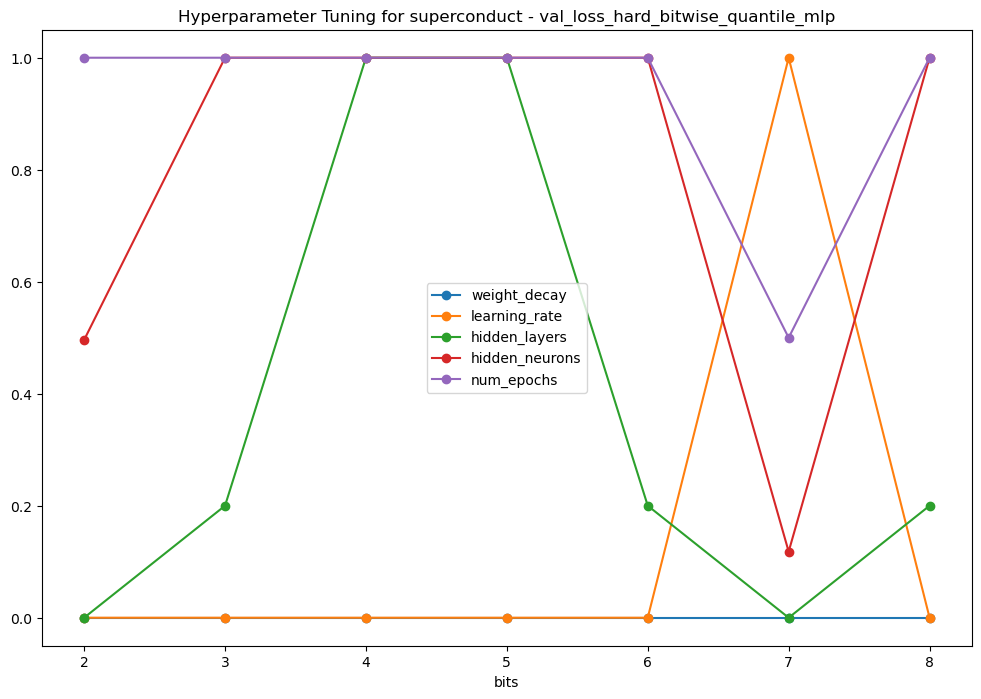

In [30]:
for los_col in loss_columns:
    # loss_col = 'val_loss_hard_thr_pre_mlp'
    df_current = df_hyp[df_hyp['optimal_loss'] == los_col]
    df_current.plot(x='bits', y =hyperparameter_columns, kind='line', marker='o', figsize=(12, 8), title=f'Hyperparameter Tuning for {dataset} - {los_col}')
    plt.show()

In [38]:
dataset = 'superconduct'
df_all = pd.DataFrame()
for f in range(2,9):
    path_df = r'../results\{}_best_models__{}bits_20runs_ext.csv'.format(dataset, f)
    df_current = pd.read_csv(path_df)
    loss_columns = [col for col in df_current.columns if 'loss' in col]
    df_current = pd.DataFrame(df_current[loss_columns].median(axis=0)).T
    df_current.index = [f]
    df_all = pd.concat([df_all, df_current], axis=0)


In [39]:
path_df = r'../results\{}_best_models__{}bits_20runs_ext.csv'.format(dataset, 4)
df_current = pd.read_csv(path_df)

In [25]:
df_current

,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,val_loss_hard_bitwise_minmax_mlp,val_loss_hard_bitwise_quantile_mlp
0,0.128750,8.447163,0.105342,0.120808,0.104385,0.090740,0.091216,0.079876,0.080318,0.102819,0.094088
1,0.097092,1.191217,0.105751,0.120819,0.106099,0.095218,0.095385,0.088638,0.089223,0.103758,0.096158
2,0.090546,7.982841,0.108194,0.127460,0.104192,0.091087,0.091156,0.083477,0.084575,0.106906,0.100594
3,0.089301,1.427619,0.102439,0.121655,0.100520,0.090329,0.090163,0.081314,0.082090,0.095675,0.095507
4,0.084364,1.674226,0.108514,0.118023,0.100840,0.089521,0.089698,0.080401,0.080990,0.104902,0.090907
5,0.087636,2.047682,0.104393,0.122459,0.109000,0.093308,0.093929,0.083910,0.084677,0.104952,0.092734
6,0.090919,14.573745,0.113532,0.122252,0.106136,0.091054,0.091212,0.085456,0.086437,0.106476,0.098598
7,0.087624,0.259409,0.105186,0.113102,0.098606,0.087189,0.087444,0.089130,0.089678,0.105156,0.096902
8,0.080422,10.745899,0.093632,0.117688,0.096850,0.085364,0.085833,0.076393,0.076869,0.100226,0.095102
9,0.087361,13.743449,0.103235,0.125175,0.101346,0.088731,0.088983,0.084485,0.085125,0.105747,0.097962


In [8]:
df_current.describe()

,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,val_loss_hard_bitwise_minmax_mlp,val_loss_hard_bitwise_quantile_mlp
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,115.937032,172.172144,146.888716,124.650334,116.885408,108.241763,111.017426,106.227649,106.283523,131.165285,110.519586
std,9.824410,10.974142,7.239064,8.715667,10.279221,5.461063,5.900083,5.284141,5.305270,8.753323,11.196207
min,98.397451,155.364262,132.328356,110.092485,100.365510,99.374496,100.343385,95.988630,95.914829,119.717973,94.959260
25%,111.165567,163.613716,144.219564,119.975042,110.969685,104.382668,106.178576,103.643134,103.703864,125.545015,102.939221
50%,114.332376,172.967615,147.563001,123.759626,115.065679,106.843452,111.248851,106.648040,106.710865,128.553551,108.951938
75%,119.061403,180.329223,148.965886,126.828662,122.154976,112.977719,113.939647,107.939971,108.063017,136.811592,114.402805
max,147.678762,194.587669,164.154815,147.883390,140.719881,120.729429,122.398244,120.903669,120.977135,153.849756,144.840369


In [10]:
df_all.loc[4]

val_loss_mlp                          115.937032
val_loss_hard_post_mlp                172.172144
val_loss_hard_thr_post_mlp            146.888716
val_loss_hard_pre_mlp                 124.650334
val_loss_hard_thr_pre_mlp             116.885408
val_loss_soft_mlp                     108.241763
val_loss_soft_hard_mlp                111.017426
val_loss_soft_comp_mlp                106.227649
val_loss_soft_hard_comp_mlp           106.283523
val_loss_hard_bitwise_minmax_mlp      131.165285
val_loss_hard_bitwise_quantile_mlp    110.519586
Name: 4, dtype: float64

In [17]:
df_all

,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp,val_loss_hard_bitwise_minmax_mlp,val_loss_hard_bitwise_quantile_mlp
2,0.507947,0.884570,0.563926,0.594775,0.520124,0.530162,0.530163,0.519478,0.519519,0.567906,0.519904
3,0.501261,0.598290,0.526045,0.574229,0.532585,0.529618,0.529967,2.475125,2.475512,0.499363,0.512129
4,0.485979,0.532915,0.546235,0.548760,0.520812,0.581628,0.581644,0.469176,0.469292,0.487050,0.486818
5,0.505483,0.491768,0.483999,0.525011,0.509431,0.511055,0.511016,0.462332,0.462322,0.477758,0.453248
6,0.555589,0.555016,0.548715,0.495737,0.501337,0.499886,0.499856,0.466919,0.467433,0.483219,0.470460
7,0.525038,0.494193,0.485437,0.496079,0.517709,0.508347,0.508346,0.490921,0.490860,0.454618,0.448503
8,0.535316,0.492035,0.497914,0.508604,0.514261,0.514552,0.514577,0.493338,0.493342,0.496426,0.492051


(100.0, 150.0)

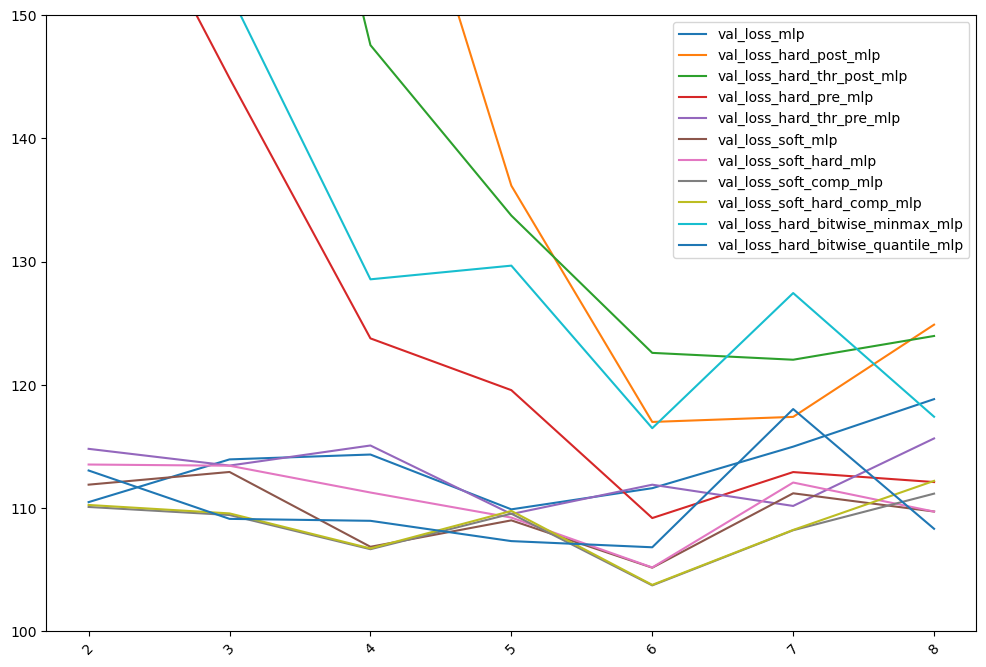

In [42]:
df_all.plot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(100,150)